Created by Josef Matondang

https://josefmtd.com

In [1]:
import json
import urllib.request
import datetime

import numpy as np
import matplotlib.pyplot as plt

# Ambil Data dari JSON API

In [2]:
def getBuoyJson(idBuoy):
    url = 'http://buoymerahputih.id/data/getdata_json.php?idbuoy=' + str(idBuoy)
    webUrl = urllib.request.urlopen(url)
    data = webUrl.read()
    return json.loads(data.decode('utf-8'))

buoyMalangJson = getBuoyJson(1)
buoyMalangTimeSeries = buoyMalangJson['data']

buoyCilacapJson = getBuoyJson(2)
buoyCilacapTimeSeries = buoyCilacapJson['data']

buoyBaliJson = getBuoyJson(3)
buoyBaliTimeSeries = buoyBaliJson['data']

buoyLampungJson = getBuoyJson(4)
buoyLampungTimeSeries = buoyLampungJson['data']

# Ubah Data ke Time Series

In [3]:
def parseDataTimestamp(buoyDataSeries):
    dateTimeSeries = []
    dataBuoySeries = []

    for x in range(len(buoyDataSeries)):
        # Get the datetime string and convert to datetime
        timeString = buoyDataSeries[x]['date_time']
        dateTime = datetime.datetime.strptime(timeString, '%Y-%m-%d %H:%M:%S')

        # Get the raw data of buoy depth (in cm)
        dataBuoy = buoyDataSeries[x]['data_pengukuran']

        # Insert to list
        dataBuoySeries.append(dataBuoy)
        dateTimeSeries.append(dateTime)
    
    return dataBuoySeries, dateTimeSeries

dataBuoyMalang, dateTimeMalang = parseDataTimestamp(buoyMalangTimeSeries)
dataBuoyCilacap, dateTimeCilacap = parseDataTimestamp(buoyCilacapTimeSeries)
dataBuoyBali, dateTimeBali = parseDataTimestamp(buoyBaliTimeSeries)
dataBuoyLampung, dateTimeLampung = parseDataTimestamp(buoyLampungTimeSeries)

# Ubah Data ke Array

In [4]:
dataBuoyMalangArray = np.array(dataBuoyMalang)
dateTimeMalangArray = np.array(dateTimeMalang)

dataBuoyCilacapArray = np.array(dataBuoyCilacap)
dateTimeCilacapArray = np.array(dateTimeCilacap)

dataBuoyBaliArray = np.array(dataBuoyBali)
dateTimeBaliArray = np.array(dateTimeBali)

dataBuoyLampungArray = np.array(dataBuoyLampung)
dateTimeLampungArray = np.array(dateTimeLampung)

# Data Raw ke Tinggi Muka Air

$$ z_i = \frac{x_i - x_0}{100} $$

In [5]:
x0_buoy1 = 214851
x0_buoy2 = 368858
x0_buoy3 = 444878
x0_buoy4 = 208831

tideBuoyMalangArray = np.divide(np.subtract(dataBuoyMalangArray, x0_buoy1), 100)
tideBuoyCilacapArray = np.divide(np.subtract(dataBuoyCilacapArray, x0_buoy2), 100)
tideBuoyBaliArray = np.divide(np.subtract(dataBuoyBaliArray, x0_buoy3), 100)
tideBuoyLampungArray = np.divide(np.subtract(dataBuoyLampungArray, x0_buoy4), 100)

# Plot Tinggi Muka Air

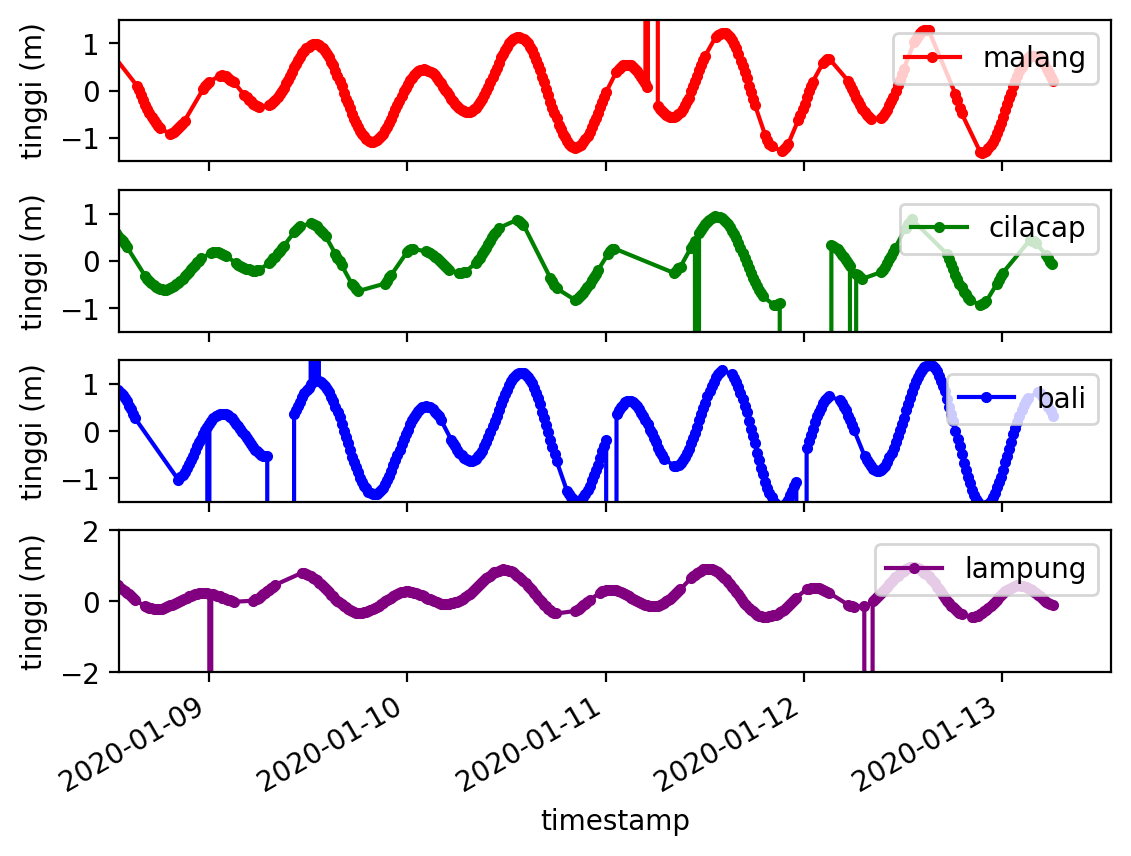

In [6]:
def plotHistoricalData (dayAgo):
    figure = plt.figure(figsize=[6.4, 4.8], dpi=200)
    
    axes1 = figure.add_subplot(411)
    axes1.set_ylabel('tinggi (m)')
    axes1.set_xlabel('timestamp')
    axes1.plot(dateTimeMalangArray, tideBuoyMalangArray, marker = '.', color = 'red', label = 'malang')
    axes1.legend(loc = 'upper right')
    axes1.set_ylim(-1.5, 1.5)
    axes1.set_xlim(datetime.datetime.now() - datetime.timedelta(days = dayAgo),
                   datetime.datetime.now())
    
    axes2 = figure.add_subplot(412)
    axes2.set_ylabel('tinggi (m)')
    axes2.set_xlabel('timestamp')
    axes2.plot(dateTimeCilacapArray, tideBuoyCilacapArray, marker = '.', color = 'green', label = 'cilacap')
    axes2.legend(loc = 'upper right')
    axes2.set_ylim(-1.5, 1.5)
    axes2.set_xlim(datetime.datetime.now() - datetime.timedelta(days = dayAgo),
                   datetime.datetime.now())
    
    axes3 = figure.add_subplot(413)
    axes3.set_ylabel('tinggi (m)')
    axes3.set_xlabel('timestamp')
    axes3.plot(dateTimeBaliArray, tideBuoyBaliArray, marker = '.', color = 'blue', label = 'bali')
    axes3.legend(loc = 'upper right')
    axes3.set_ylim(-1.5, 1.5)
    axes3.set_xlim(datetime.datetime.now() - datetime.timedelta(days = dayAgo),
                   datetime.datetime.now())
    
    axes4 = figure.add_subplot(414)
    axes4.set_ylabel('tinggi (m)')
    axes4.set_xlabel('timestamp')
    axes4.plot(dateTimeLampungArray, tideBuoyLampungArray, marker = '.', color = 'purple', label = 'lampung')
    axes4.legend(loc = 'upper right')
    axes4.set_ylim(-2, 2)
    axes4.set_xlim(datetime.datetime.now() - datetime.timedelta(days = dayAgo),
                   datetime.datetime.now())
    
    plt.gcf().autofmt_xdate()
    plt.savefig('buoy_merah_putih.png')
    plt.show()
    
plotHistoricalData(5)